# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Проверили данные на пропуски, дополнительная предобработка не требуется.

<div class="alert alert-info">
Привет Марат, будет здорово, если сбросишь ссылки где это можно почитать.

## Разбейте данные на выборки

*Разделим выборку на обучающую, валидационную и тестовую в соотношении 3:1:1*

In [ ]:
df_train,df_dol = train_test_split(df,test_size = 0.4,random_state = 12345)#Отдаем 60 процентов обучающей выборке

In [ ]:
df_valid,df_test  = train_test_split(df_dol,test_size = 0.5,random_state = 12345)#оставшиеся 40 процентов данных делим между
#валидационной выборкой и тестовой

Ниже проверяем как распределились данные

In [ ]:
df_train

,calls,minutes,messages,mb_used,is_ultra
3027,60.0,431.56,26.0,14751.26,0
434,33.0,265.17,59.0,17398.02,0
1226,52.0,341.83,68.0,15462.38,0
1054,42.0,226.18,21.0,13243.48,0
1842,30.0,198.42,0.0,8189.53,0
...,...,...,...,...,...
2817,12.0,86.62,22.0,36628.85,1
546,65.0,458.46,0.0,15214.25,1
382,144.0,906.18,0.0,25002.44,1
2177,38.0,301.27,37.0,28914.24,1


In [ ]:
df_valid

,calls,minutes,messages,mb_used,is_ultra
1386,92.0,536.96,18.0,20193.90,0
3124,40.0,286.57,17.0,17918.75,0
1956,81.0,531.22,56.0,17755.06,0
2286,67.0,460.76,27.0,16626.26,0
3077,22.0,120.09,16.0,9039.57,0
...,...,...,...,...,...
1999,56.0,398.45,4.0,23682.94,0
1023,76.0,601.10,0.0,17104.36,0
748,81.0,525.97,15.0,18878.91,0
1667,10.0,63.03,0.0,2568.00,1


In [ ]:
df_test

,calls,minutes,messages,mb_used,is_ultra
160,61.0,495.11,8.0,10891.23,0
2498,80.0,555.04,28.0,28083.58,0
1748,87.0,697.23,0.0,8335.70,0
1816,41.0,275.80,9.0,10032.39,0
1077,60.0,428.49,20.0,29389.52,1
...,...,...,...,...,...
2401,55.0,446.06,79.0,26526.28,0
2928,102.0,742.65,58.0,16089.24,1
1985,52.0,349.94,42.0,12150.72,0
357,39.0,221.18,59.0,17865.23,0


## Исследуйте модели

In [ ]:
#Исследуем решающее дерево
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
max_depth = []
accuracy = []
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state = 12345,max_depth = depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    max_depth.append(depth)
    accuracy.append(accuracy_score(target_valid, predictions_valid))
    print('max_depth', depth,accuracy_score(target_valid, predictions_valid))


max_depth 1 0.7542768273716952
max_depth 2 0.7822706065318819
max_depth 3 0.7853810264385692
max_depth 4 0.7791601866251944
max_depth 5 0.7791601866251944


Исходя из тестов видим, что лучшее accuracy имеет модель с максимальной глубиной 2 и 3

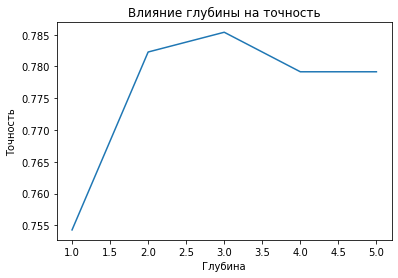

In [ ]:

plt.plot(max_depth,accuracy)
plt.title('Влияние глубины на точность')
plt.xlabel('Глубина')
plt.ylabel('Точность')
plt.show()

In [ ]:
#Исследуем случайный лес
best_accuracy = 0
best_depth = 0
for est in range(1,100,5):
    for depth in range(1,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth)
        model.fit(features_train,target_train)
        result = model.predict(features_valid)
        accuracy = model.score(features_valid, target_valid)
        if accuracy > best_accuracy:
                best_accuracy = accuracyм
                best_depth = depth
                best_est = est
print("Глубина дерева:", best_depth, "Количество деревьев:", best_est, "Качество:", best_accuracy)



Глубина дерева: 7     Количество деревьев: 26   Качество: 0.807153965785381


При протестированных  значениях n_estimators(кол-ва деревьев) и глубина(max_depth) лучшие показатели accuracy = 0.80
при параметрах: глубина = 7,кол-во деревьев = 26

<div class="alert alert-info">
Добавил второй цикл, для гиперпараметра max_depth, метрики улучшились

In [ ]:
#Исследуем логистическую регрессию
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train,target_train)
logistic_result = model.predict(features_valid)
print('accuracy = ', accuracy_score(target_valid, logistic_result))


accuracy =  0.7107309486780715


Логистическая регрессия показывает самый низкий accuracy среди моделей

В результате тестирования на валидной выборке лидерами по показателю точности является случайный лес и решающее дерево. Логистическая регрессия имеет самый низкий показатель точности.

## Проверьте модель на тестовой выборке

Подставляем самые удачные гиперпараметры и проверяем на тестовых данных

In [ ]:
#Проверяем случайный лес
model = RandomForestClassifier(random_state=12345, n_estimators=26,max_depth=7)
model.fit(features_train,target_train)
result_test = model.predict(features_test)
print('Accuricy =',accuracy_score(target_test, result_test))

Accuricy = 0.80248833592535


При проверке случайного леса на тестовой выборке,видим что качество метрики не упало и равняется 0.80

Для проверке модели на адекватность будем использовать DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)

dummy_clf.fit(features_train,target_train)

print('Accuricy =',dummy_clf.score(features_test, target_test))

Accuricy = 0.6842923794712286


***Общие выводы:
Было протестированны 3 модели(случайный лес, решающее дерево.логистическая регрессия)
В результате тестов выяснили, что наилучшие показатели имеет случайный лес 0.80, при показатели n_estimators=26 и max_depth=7,
В след по точности идет решающее дерево 0.78 при показатели max_depth=3.
Логистическая регрессия имеет самый низкий показатель точности и не проходит проверку на адекватность, показатель accuracy равен
показателю точности простого метода DummyClassifier.
В работе необходимо использовать случайный лес в виду высокого показателя точности.***